In [1]:
import numpy as np
import pandas as pd
import xlrd
import xlwt
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import jupyterlab
%matplotlib inline
import warnings

In [2]:
warnings.filterwarnings(action='ignore', category=UserWarning)

In [3]:
training = pd.read_csv('processedTrain.csv')

In [4]:

X = training.drop(['AVERAGE_SPEED_DIFF'],axis=1)

y = training['AVERAGE_SPEED_DIFF']


In [5]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE 
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTEENN 
from imblearn.combine import SMOTETomek 
from imblearn.under_sampling import NearMiss 

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=2021,stratify=y)

In [7]:
#scaler = preprocessing.StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

In [8]:
X_res = X_train
#X_test = X_test_scaled
y_res = y_train

In [9]:
y_train.value_counts()

None         1760
Medium       1321
Low          1135
High          850
Very_High     383
Name: AVERAGE_SPEED_DIFF, dtype: int64

In [10]:
strat = {
    0: 1321,
    1: 1135,
    2: 1321, 
    3: 850,
    4: 383,
}

nm = NearMiss(sampling_strategy=strat)

#X_under, y_under = nm.fit_resample(X_train_scaled, y_train)

#rus = RandomUnderSampler(sampling_strategy=strat)
#X_under, y_under = rus.fit_resample(X_train_scaled, y_train)


#X_res, y_res = ros.fit_resample(X_under, y_under)


In [11]:

ros = RandomOverSampler(sampling_strategy="not majority")
smote = SMOTE(k_neighbors = 3)
adasyn = ADASYN(random_state=2021)
smoteBorder = BorderlineSMOTE(kind='borderline-2')
smoteenn = SMOTEENN(sampling_strategy='not majority')
smotetomek = SMOTETomek(sampling_strategy='auto')
smoteSVM = SVMSMOTE(random_state=2021,sampling_strategy="not majority")
oversample = [ros,smote,adasyn,smoteBorder,smoteenn,smotetomek,smoteSVM]

In [12]:
#y_train.value_counts().plot.pie(autopct='%.2f')

In [13]:
#y_res.value_counts().plot.pie(autopct='%.2f')

In [14]:
#sns.displot(y_res)
#sns.displot(y_test)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from imblearn.under_sampling import NearMiss
from sklearn.linear_model import RidgeClassifier
from imblearn.pipeline import make_pipeline
from imblearn.pipeline import Pipeline 
from numpy import mean
from numpy import std

In [16]:
lr = LogisticRegression(solver='liblinear',random_state=2021)
rf=RandomForestClassifier(random_state=2021,n_estimators=100)
knn=KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=2021)
ada = AdaBoostClassifier(random_state=2021)
svc = SVC(random_state=2021)
xgb = XGBClassifier()
rc = RidgeClassifier(random_state=2021)

In [17]:
from sklearn.model_selection import StratifiedKFold
cv_strat = StratifiedKFold(n_splits=10, shuffle=True, random_state=2021)

In [18]:
models = [lr,rf,knn,dt,ada,svc,rc,xgb] 

In [19]:
for j in oversample:
    sampling = j
    print('.................... '+str(j)+' ..........................')
    for i in models:
        model = i
        imba_pipeline = make_pipeline(sampling,model)
    
        print('______________________________________________')
        print(i)
        print('..............................................')
        cv = cross_val_score(imba_pipeline,X,y,cv=cv_strat,n_jobs=-1)
        imba_pipeline.fit(X_res,y_res)
        test_score = imba_pipeline.score(X_test, y_test)
        print('Folds: ',cv)
        print('CV Accuracy: %.3f (%.3f)' % (mean(cv*100), std(cv*100)))
        print('Test Accuracy score: ',test_score*100)
        if (mean(cv)>best[0]):
            best = tuple((mean(cv),i,j))
print('Best: '+ str(best) )


.................... RandomOverSampler(sampling_strategy='not majority') ..........................
______________________________________________
LogisticRegression(random_state=2021, solver='liblinear')
..............................................
Folds:  [0.73167155 0.73900293 0.73715125 0.69750367 0.70484581 0.69750367
 0.74743025 0.75917768 0.74302496 0.7298091 ]
CV Accuracy: 0.729 (0.020)
Test Accuracy score:  72.63389581804842
______________________________________________
RandomForestClassifier(random_state=2021)
..............................................
Folds:  [0.81671554 0.82404692 0.8061674  0.79735683 0.81497797 0.79295154
 0.80029369 0.81497797 0.79001468 0.80910426]
CV Accuracy: 0.807 (0.011)
Test Accuracy score:  81.29126925898753
______________________________________________
KNeighborsClassifier()
..............................................
Folds:  [0.6686217  0.63489736 0.66226138 0.63582966 0.61380323 0.64023495
 0.61820852 0.62555066 0.66372981 0.63729809

In [20]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

In [21]:
#simple performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Test Score: ' + str(classifier.score(X_test, y_test)))
    print('Best Parameters: ' + str(classifier.best_params_))

In [22]:
'''param_grid = {'max_iter' : [200000000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

new_params = {'lr__' + key: param_grid[key] for key in param_grid}

lr_pipe = Pipeline(steps=[("smote", smote), ("lr", lr)])

clf_lr = GridSearchCV(lr_pipe, param_grid = new_params, cv = cv_strat, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_res,y_res)
clf_performance(best_clf_lr,'Logistic Regression')'''


'param_grid = {\'max_iter\' : [200000000],\n              \'penalty\' : [\'l1\', \'l2\'],\n              \'C\' : np.logspace(-4, 4, 20),\n              \'solver\' : [\'liblinear\']}\n\nnew_params = {\'lr__\' + key: param_grid[key] for key in param_grid}\n\nlr_pipe = Pipeline(steps=[("smote", smote), ("lr", lr)])\n\nclf_lr = GridSearchCV(lr_pipe, param_grid = new_params, cv = cv_strat, verbose = True, n_jobs = -1)\nbest_clf_lr = clf_lr.fit(X_res,y_res)\nclf_performance(best_clf_lr,\'Logistic Regression\')'

In [23]:
param_grid = {'n_neighbors' : [3],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto'],
              'p' : [1,2]}

new_params = {'knn__' + key: param_grid[key] for key in param_grid}

knn_pipe = Pipeline(steps=[("smote", smote), ("knn", knn)])

clf_knn = GridSearchCV(estimator=knn_pipe, param_grid = new_params, cv = cv_strat, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(X_res,y_res)
clf_performance(best_clf_knn,'KNN')

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


KNN
Best Score: 0.6858118591473287
Test Score: 0.677916360968452
Best Parameters: {'knn__algorithm': 'auto', 'knn__n_neighbors': 3, 'knn__p': 1, 'knn__weights': 'distance'}


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.6s finished


In [24]:
'''param_grid =  {'n_estimators': [50,100,200,300,400,500,600,700,800,900,1000],
               'criterion':['gini','entropy'],
                                  'bootstrap': [True,False],
                                  'max_depth': [3,5,10,20,50,75,100,None],
                                  'max_features': ['auto','sqrt'],
                                  'min_samples_leaf': [1,2,4,10],
                                  'min_samples_split': [2,5,10]}
                                  
new_params = {'rf__' + key: param_grid[key] for key in param_grid}

rf_pipe = Pipeline(steps=[("smote", smote), ("rf", rf)])
                                  
clf_rf = RandomizedSearchCV(rf_pipe, param_distributions= new_params,cv = cv_strat, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_res,y_res)
clf_performance(best_clf_rf,'Random Forest')'''



'param_grid =  {\'n_estimators\': [50,100,200,300,400,500,600,700,800,900,1000],\n               \'criterion\':[\'gini\',\'entropy\'],\n                                  \'bootstrap\': [True,False],\n                                  \'max_depth\': [3,5,10,20,50,75,100,None],\n                                  \'max_features\': [\'auto\',\'sqrt\'],\n                                  \'min_samples_leaf\': [1,2,4,10],\n                                  \'min_samples_split\': [2,5,10]}\n                                  \nnew_params = {\'rf__\' + key: param_grid[key] for key in param_grid}\n\nrf_pipe = Pipeline(steps=[("smote", smote), ("rf", rf)])\n                                  \nclf_rf = RandomizedSearchCV(rf_pipe, param_distributions= new_params,cv = cv_strat, verbose = True, n_jobs = -1)\nbest_clf_rf = clf_rf.fit(X_res,y_res)\nclf_performance(best_clf_rf,\'Random Forest\')'

In [25]:
param_grid =  {'n_estimators': [100],
               'min_samples_split': [2],
               'min_samples_leaf': [1],
               'max_features': ['sqrt'],
               'max_depth': [25],
               'criterion': ['gini'],
               'bootstrap': [True]}

new_params = {'rf__' + key: param_grid[key] for key in param_grid}

rf_pipe = Pipeline(steps=[("smote", smote), ("rf", rf)])
                                  
clf_rf = GridSearchCV(rf_pipe, param_grid= new_params,cv = cv_strat, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_res,y_res)
clf_performance(best_clf_rf,'Random Forest')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.7s finished


Random Forest
Best Score: 0.8025310307609284
Test Score: 0.8092443140132062
Best Parameters: {'rf__bootstrap': True, 'rf__criterion': 'gini', 'rf__max_depth': 25, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 100}


<AxesSubplot:>

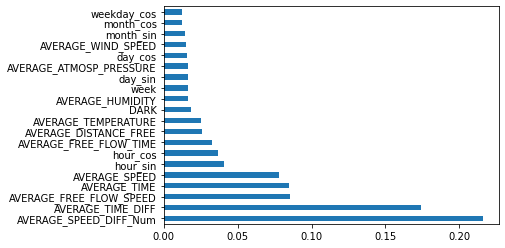

In [26]:
best_rf = best_clf_rf.best_estimator_.fit(X_res,y_res)

feat_importances = pd.Series(best_rf.steps[1][1].feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [27]:
'''param_grid = {
    'n_estimators': [450,500,550],
    'colsample_bytree': [0.75,0.8,0.85,1],
    'max_depth': [None,10,20,30,50,100,200,300],
    'reg_alpha': [0,1,2],
    'reg_lambda': [2, 5, 10],
    'subsample': [0.55, 0.6, .65],
    'learning_rate':[0.2,0.3,0.5,0.6,0.7],
    'gamma':[.5,1,2],
    'min_child_weight':[0.01],
    'sampling_method': ['uniform']
}

new_params = {'xgb__' + key: param_grid[key] for key in param_grid}

xgb_pipe = Pipeline(steps=[("smote", smote), ("xgb", xgb)])

clf_xgb = RandomizedSearchCV(xgb_pipe, param_distributions = new_params, cv = cv_strat, verbose = True, n_jobs = -1)
best_clf_xgb = clf_xgb.fit(X,y)
clf_performance(best_clf_xgb,'XGB')'''


'param_grid = {\n    \'n_estimators\': [450,500,550],\n    \'colsample_bytree\': [0.75,0.8,0.85,1],\n    \'max_depth\': [None,10,20,30,50,100,200,300],\n    \'reg_alpha\': [0,1,2],\n    \'reg_lambda\': [2, 5, 10],\n    \'subsample\': [0.55, 0.6, .65],\n    \'learning_rate\':[0.2,0.3,0.5,0.6,0.7],\n    \'gamma\':[.5,1,2],\n    \'min_child_weight\':[0.01],\n    \'sampling_method\': [\'uniform\']\n}\n\nnew_params = {\'xgb__\' + key: param_grid[key] for key in param_grid}\n\nxgb_pipe = Pipeline(steps=[("smote", smote), ("xgb", xgb)])\n\nclf_xgb = RandomizedSearchCV(xgb_pipe, param_distributions = new_params, cv = cv_strat, verbose = True, n_jobs = -1)\nbest_clf_xgb = clf_xgb.fit(X,y)\nclf_performance(best_clf_xgb,\'XGB\')'

In [28]:

param_grid = {
    'n_estimators': [550],
    'colsample_bytree': [0.75],
    'max_depth': [50],
    'reg_alpha': [2],
    'reg_lambda': [5],
    'subsample': [0.55],
    'learning_rate':[0.3],
    'gamma':[.5],
    'min_child_weight':[0.01],
    'sampling_method': ['uniform']
}

new_params = {'xgb__' + key: param_grid[key] for key in param_grid}

xgb_pipe = Pipeline(steps=[("smote", smote), ("xgb", xgb)])

clf_xgb = GridSearchCV(xgb_pipe, param_grid = new_params, cv = cv_strat, verbose = True, n_jobs = -1)
best_clf_xgb = clf_xgb.fit(X_res,y_res)
clf_performance(best_clf_xgb,'XGB')


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.8min finished


[12:07:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB
Best Score: 0.8005140313005936
Test Score: 0.8195157740278797
Best Parameters: {'xgb__colsample_bytree': 0.75, 'xgb__gamma': 0.5, 'xgb__learning_rate': 0.3, 'xgb__max_depth': 50, 'xgb__min_child_weight': 0.01, 'xgb__n_estimators': 550, 'xgb__reg_alpha': 2, 'xgb__reg_lambda': 5, 'xgb__sampling_method': 'uniform', 'xgb__subsample': 0.55}


In [32]:
lr = make_pipeline(sampling,lr).fit(X_res,y_res)
dt = make_pipeline(sampling,dt).fit(X_res,y_res)
knn = make_pipeline(sampling,knn).fit(X_res,y_res)
rf = make_pipeline(sampling,rf).fit(X_res,y_res)
xgb = make_pipeline(sampling,xgb).fit(X_res,y_res)

[12:09:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [33]:
all_models=[lr,dt,knn,rf,xgb,best_clf_knn,best_clf_rf,best_clf_xgb]

______________________________________________
Pipeline(steps=[('svmsmote',
                 SVMSMOTE(random_state=2021, sampling_strategy='not majority')),
                ('pipeline',
                 Pipeline(steps=[('svmsmote',
                                  SVMSMOTE(random_state=2021,
                                           sampling_strategy='not majority')),
                                 ('pipeline',
                                  Pipeline(steps=[('svmsmote',
                                                   SVMSMOTE(random_state=2021,
                                                            sampling_strategy='not '
                                                                              'majority')),
                                                  ('pipeline',
                                                   Pipeline(steps=[('svmsmote',
                                                                    SVMSMOTE(random_s...
                              

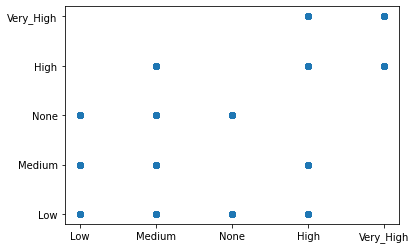

______________________________________________
Pipeline(steps=[('svmsmote',
                 SVMSMOTE(random_state=2021, sampling_strategy='not majority')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=2021))])
..............................................


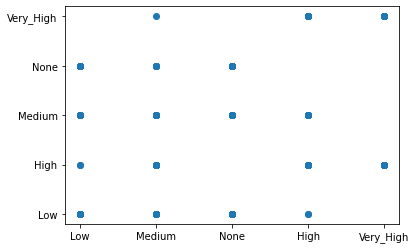

______________________________________________
Pipeline(steps=[('svmsmote',
                 SVMSMOTE(random_state=2021, sampling_strategy='not majority')),
                ('kneighborsclassifier', KNeighborsClassifier())])
..............................................


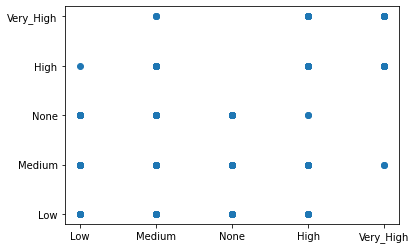

______________________________________________
Pipeline(steps=[('svmsmote',
                 SVMSMOTE(random_state=2021, sampling_strategy='not majority')),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=2021))])
..............................................


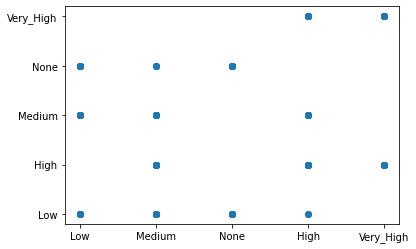

______________________________________________
Pipeline(steps=[('svmsmote',
                 SVMSMOTE(random_state=2021, sampling_strategy='not majority')),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=12, num_parallel_tree=1,
                               objective='multi:softprob', predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                    

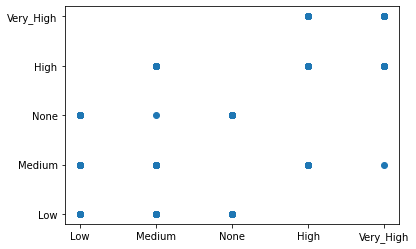

______________________________________________
GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=2021, shuffle=True),
             estimator=Pipeline(steps=[('smote', SMOTE(k_neighbors=3)),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__algorithm': ['auto'], 'knn__n_neighbors': [3],
                         'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']},
             verbose=True)
..............................................


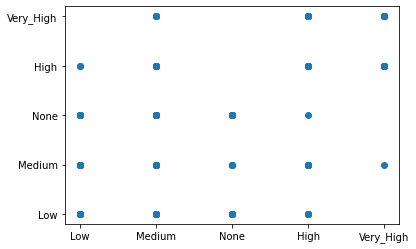

______________________________________________
GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=2021, shuffle=True),
             estimator=Pipeline(steps=[('smote', SMOTE(k_neighbors=3)),
                                       ('rf',
                                        RandomForestClassifier(random_state=2021))]),
             n_jobs=-1,
             param_grid={'rf__bootstrap': [True], 'rf__criterion': ['gini'],
                         'rf__max_depth': [25], 'rf__max_features': ['sqrt'],
                         'rf__min_samples_leaf': [1],
                         'rf__min_samples_split': [2],
                         'rf__n_estimators': [100]},
             verbose=True)
..............................................


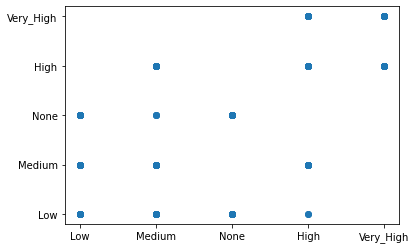

______________________________________________
GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=2021, shuffle=True),
             estimator=Pipeline(steps=[('smote', SMOTE(k_neighbors=3)),
                                       ('xgb',
                                        XGBClassifier(base_score=0.5,
                                                      booster='gbtree',
                                                      colsample_bylevel=1,
                                                      colsample_bynode=1,
                                                      colsample_bytree=1,
                                                      enable_categorical=False,
                                                      gamma=0, gpu_id=-1,
                                                      importance_type=None,
                                                      interaction_constraints='',
                                                      learning_rate=0...
     

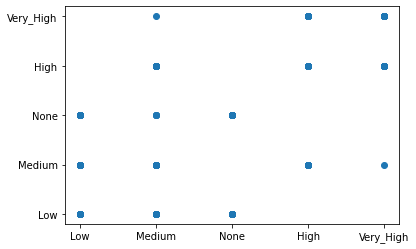

In [34]:
for i in all_models:
    print('______________________________________________')
    print(i)
    print('..............................................')
    prediction = i.predict(X_test)
    plt.scatter(y_test,prediction)
    plt.show()

In [69]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.datasets import make_classification

Pipeline(steps=[('svmsmote',
                 SVMSMOTE(random_state=2021, sampling_strategy='not majority')),
                ('pipeline',
                 Pipeline(steps=[('svmsmote',
                                  SVMSMOTE(random_state=2021,
                                           sampling_strategy='not majority')),
                                 ('pipeline',
                                  Pipeline(steps=[('svmsmote',
                                                   SVMSMOTE(random_state=2021,
                                                            sampling_strategy='not '
                                                                              'majority')),
                                                  ('pipeline',
                                                   Pipeline(steps=[('svmsmote',
                                                                    SVMSMOTE(random_s...
                                                                             

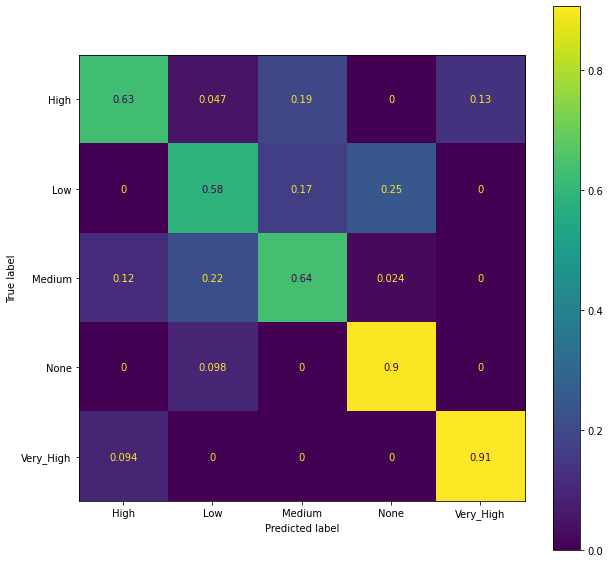

Pipeline(steps=[('svmsmote',
                 SVMSMOTE(random_state=2021, sampling_strategy='not majority')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=2021))])


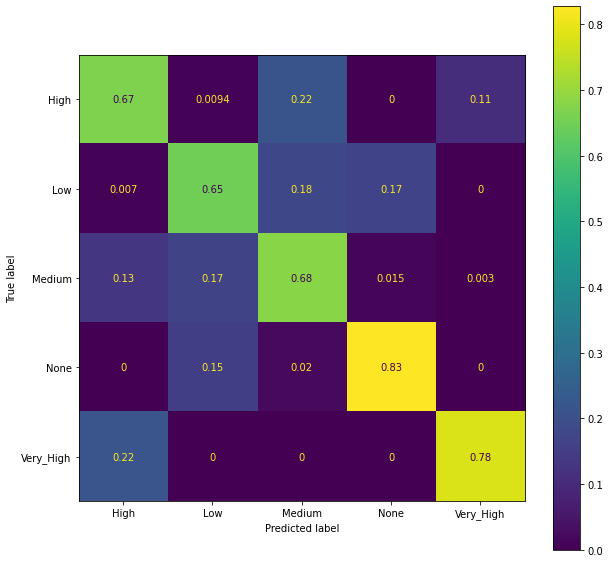

Pipeline(steps=[('svmsmote',
                 SVMSMOTE(random_state=2021, sampling_strategy='not majority')),
                ('kneighborsclassifier', KNeighborsClassifier())])


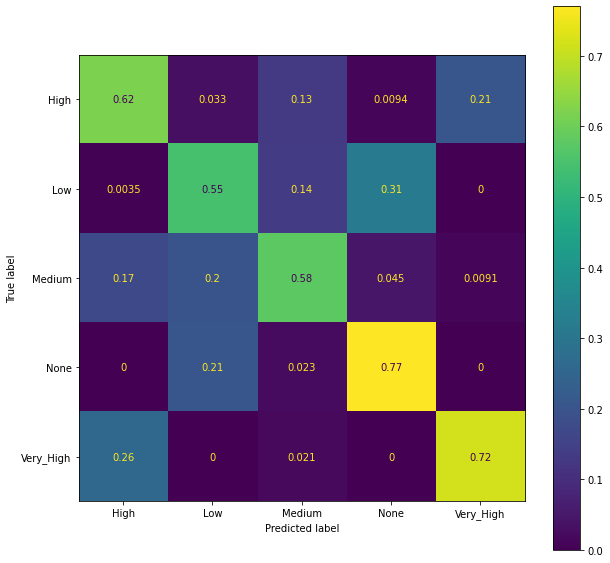

Pipeline(steps=[('svmsmote',
                 SVMSMOTE(random_state=2021, sampling_strategy='not majority')),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=2021))])


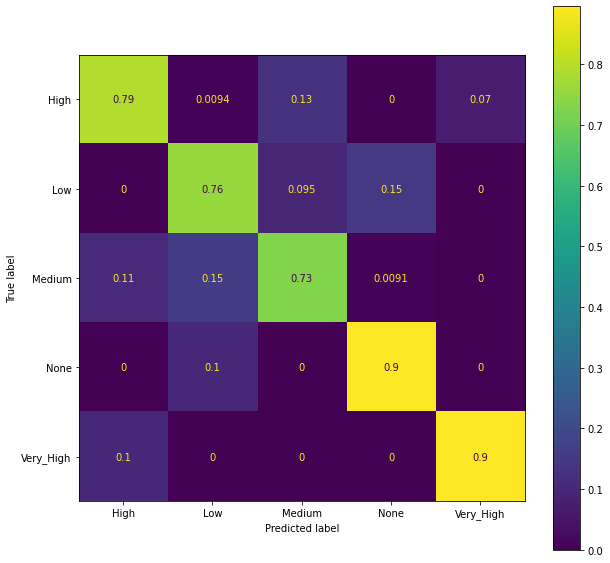

Pipeline(steps=[('svmsmote',
                 SVMSMOTE(random_state=2021, sampling_strategy='not majority')),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=12, num_parallel_tree=1,
                               objective='multi:softprob', predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=None, subsample=1,


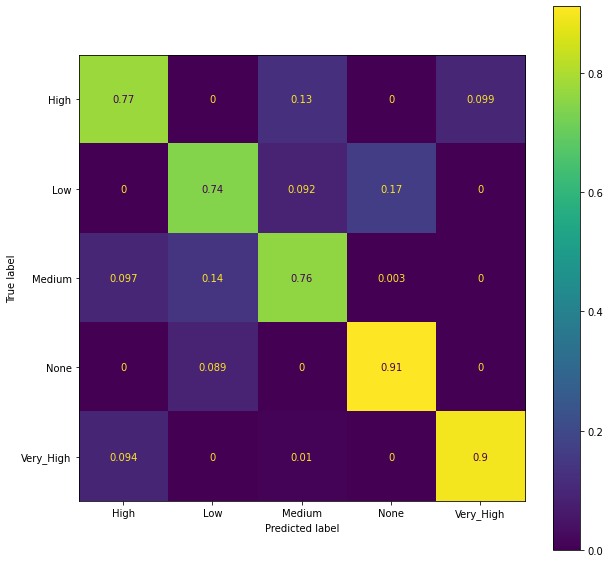

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=2021, shuffle=True),
             estimator=Pipeline(steps=[('smote', SMOTE(k_neighbors=3)),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__algorithm': ['auto'], 'knn__n_neighbors': [3],
                         'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']},
             verbose=True)


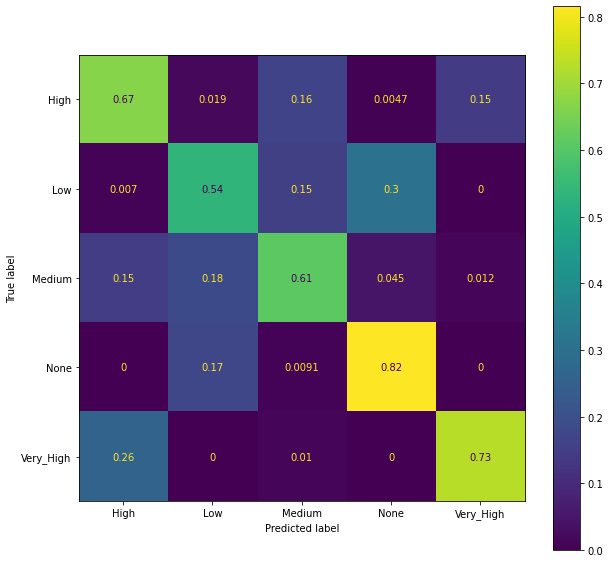

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=2021, shuffle=True),
             estimator=Pipeline(steps=[('smote', SMOTE(k_neighbors=3)),
                                       ('rf',
                                        RandomForestClassifier(random_state=2021))]),
             n_jobs=-1,
             param_grid={'rf__bootstrap': [True], 'rf__criterion': ['gini'],
                         'rf__max_depth': [25], 'rf__max_features': ['sqrt'],
                         'rf__min_samples_leaf': [1],
                         'rf__min_samples_split': [2],
                         'rf__n_estimators': [100]},
             verbose=True)


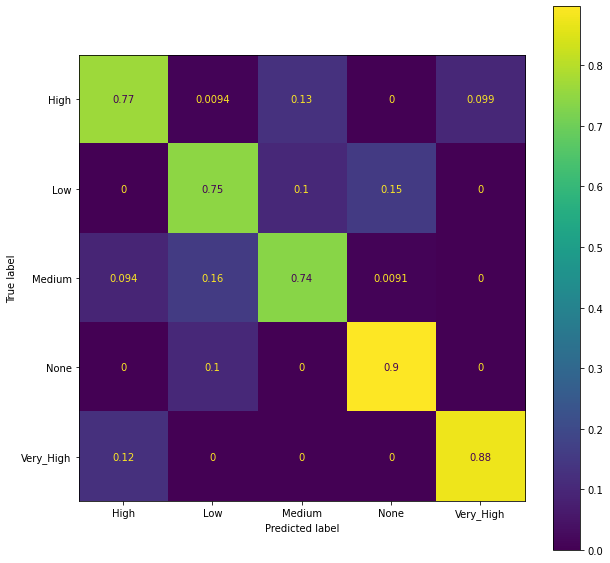

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=2021, shuffle=True),
             estimator=Pipeline(steps=[('smote', SMOTE(k_neighbors=3)),
                                       ('xgb',
                                        XGBClassifier(base_score=0.5,
                                                      booster='gbtree',
                                                      colsample_bylevel=1,
                                                      colsample_bynode=1,
                                                      colsample_bytree=1,
                                                      enable_categorical=False,
                                                      gamma=0, gpu_id=-1,
                                                      importance_type=None,
                                                      interaction_constraints='',
                                                      learning_rate=0...
                                                    

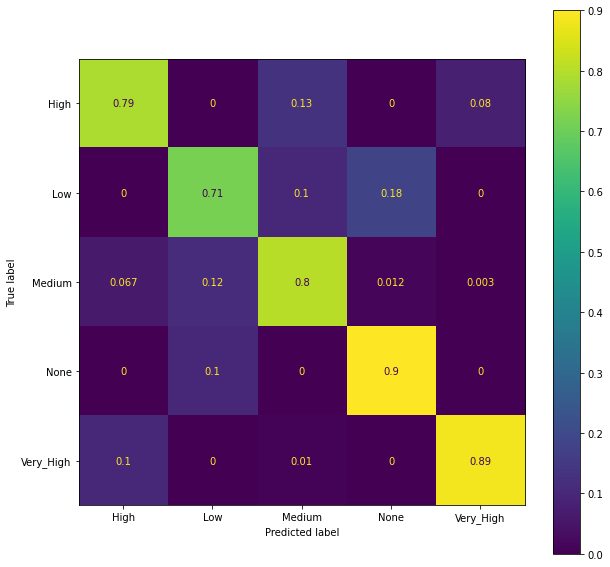

In [84]:
for i in all_models:
    model = i
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    # Normalise
    cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    disp = ConfusionMatrixDisplay(confusion_matrix=cmn,display_labels=model.classes_)
    fig, ax = plt.subplots(figsize=(10, 10))
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    print(model)
    disp.plot(ax = ax)
    plt.show()

In [85]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

for i in all_models:
    print(i)
    y_pred = i.predict(X_test)
    print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

    print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
    print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
    print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

    print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
    print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
    print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

    print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
    print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
    print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))


    print('\nClassification Report\n')
    print(classification_report(y_test, y_pred, target_names=['None', 'Low', 'Medium', 'High', 'Very_High']))

Pipeline(steps=[('svmsmote',
                 SVMSMOTE(random_state=2021, sampling_strategy='not majority')),
                ('pipeline',
                 Pipeline(steps=[('svmsmote',
                                  SVMSMOTE(random_state=2021,
                                           sampling_strategy='not majority')),
                                 ('pipeline',
                                  Pipeline(steps=[('svmsmote',
                                                   SVMSMOTE(random_state=2021,
                                                            sampling_strategy='not '
                                                                              'majority')),
                                                  ('pipeline',
                                                   Pipeline(steps=[('svmsmote',
                                                                    SVMSMOTE(random_s...
                                                                             

In [37]:
import pickle

In [38]:
#filename = 'rf-grid-81-75-73-90-92.sav'
#pickle.dump(best_clf_rf, open(filename, 'wb'))

In [39]:
#loaded_model = pickle.load(open(filename, 'rb'))

In [40]:
testing = pd.read_csv('processedTest.csv')

In [41]:
#testing[['AVERAGE_ATMOSP_PRESSURE','AVERAGE_HUMIDITY','AVERAGE_TEMPERATURE','AVERAGE_TIME_DIFF','AVERAGE_WIND_SPEED','AVERAGE_TIME','AVERAGE_SPEED','AVERAGE_SPEED_DIFF_Num']] = scaler.transform(testing[['AVERAGE_ATMOSP_PRESSURE','AVERAGE_HUMIDITY','AVERAGE_TEMPERATURE','AVERAGE_TIME_DIFF','AVERAGE_WIND_SPEED','AVERAGE_TIME','AVERAGE_SPEED','AVERAGE_SPEED_DIFF_Num']])

In [42]:
#testing_scaled = scaler.transform(testing)

In [43]:
prediction = best_clf_rf.predict(testing)

In [44]:
prediction = pd.DataFrame({'AVERAGE_SPEED_DIFF': prediction})

In [45]:
#prediction.loc[prediction.AVERAGE_SPEED_DIFF == 0, 'AVERAGE_SPEED_DIFF'] = 'None'
#prediction.loc[prediction.AVERAGE_SPEED_DIFF == 1, 'AVERAGE_SPEED_DIFF'] = 'Low'
#prediction.loc[prediction.AVERAGE_SPEED_DIFF == 2, 'AVERAGE_SPEED_DIFF'] = 'Medium'
#prediction.loc[prediction.AVERAGE_SPEED_DIFF == 3, 'AVERAGE_SPEED_DIFF'] = 'High'
#prediction.loc[prediction.AVERAGE_SPEED_DIFF == 4, 'AVERAGE_SPEED_DIFF'] = 'Very_High'


In [46]:
sub_df = pd.read_csv('example_submission.csv')
final_data = {'RowId': sub_df.RowId, 'Speed_Diff': prediction.AVERAGE_SPEED_DIFF}
submission = pd.DataFrame(data=final_data)

In [47]:
compare = pd.read_csv('sample_submission.csv')

In [48]:
submission['Speed_Diff'].value_counts()

None         428
Low          365
Medium       326
High         268
Very_High    113
Name: Speed_Diff, dtype: int64

In [49]:
compare['Speed_Diff'].value_counts()

None         482
Medium       340
Low          313
High         268
Very_High     97
Name: Speed_Diff, dtype: int64

In [50]:
df1 = np.where(submission['Speed_Diff'] == compare['Speed_Diff'], 'True', 'False')
df1 = pd.DataFrame(df1)
df1.columns=['equals']
df1.value_counts()

equals
True      1273
False      227
dtype: int64

In [51]:
submission.to_csv('submission.csv',index=False)